In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances, davies_bouldin_score
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pickle


#from google.colab import drive
#drive.mount('/content/gdrive')

In [26]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)
df_train

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


Declaration

In [27]:
#X_N = df_train[['N']] #.iloc[:100]
#X_P = df_train[['P']]
#X_K = df_train[['K']]
#X_temp = df_train[['temperature']]
#X_moist = df_train[['humidity']]
#y = df_train[['ph']] #.iloc[:100]




In [28]:
y = df_train[['N']] #.iloc[:100]
X_P = df_train[['P']]
X_K = df_train[['K']]
X_temp = df_train[['temperature']]
X_moist = df_train[['humidity']]
#y = df_train[['ph']] #.iloc[:100]

In [29]:
class kMeans():
  def __init__(self):
    return
    
  def input_train(self, X_in, y_in):
    self.X = X_in
    self.y = y_in
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
    
    self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
    #self.data = pd.concat([self.X, self.y], axis=1).to_numpy()
    return self.data
  def kmeans_test(self,clust):
    self.km = KMeans(n_clusters = clust)
    self.clusters = self.km.fit_predict(self.data)
    self.clust_data = plt.scatter(*zip(*self.data),c=self.clusters)
    
    self.labels = self.km.labels_
    
    print(self.labels)
    print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(self.data, self.labels))
    print("Davies-Bouldin Index: %0.3f" % metrics.davies_bouldin_score(self.data, self.labels))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(self.data, self.labels))
    
    
    return self.clust_data
  
  def outlier(self,threshold):
    self.centroids = self.km.cluster_centers_
    self.points = np.empty((0,len(self.data[0])), float)
    self.distances = np.empty((0,len(self.data[0])), float)
    for i, center_elem in enumerate(self.centroids):
      self.distances = np.append(self.distances, cdist([center_elem],self.data[self.clusters == i], 'euclidean')) 
      self.points = np.append(self.points, self.data[self.clusters == i], axis=0)
      
    percentile = threshold
    self.outliers = self.points[np.where(self.distances > np.percentile(self.distances, percentile))]
    outliers_df = pd.DataFrame(self.outliers,columns =['X','y'])
    return outliers_df

  def kmeans_results(self):
    fig = plt.figure()
    plt.scatter(*zip(*self.data),c=self.clusters)
    plt.scatter(*zip(*self.outliers),marker="o",facecolor="None",edgecolor="g",s=70); 
    plt.scatter(*zip(*self.centroids),marker="o",facecolor="b",edgecolor="b",s=20);

kmeanstest = kMeans()


Nitrogen and pH

In [30]:
#meanstest.input_train(X_N,y)

In [31]:
#kmeanstest.kmeans_test(3) #no. of cluseter

In [32]:
#kmeanstest.outlier(80)

In [33]:
#kmeanstest.kmeans_results()

Phosphorous and Nitrogen 

In [34]:
kmeanstest.input_train(X_P,y)

array([[ 26,  21],
       [ 35,  29],
       [ 44,  60],
       ...,
       [ 36,  11],
       [124,  11],
       [ 78,  32]], dtype=int64)

[1 1 0 ... 1 2 1]
Calinski-Harabasz Index: 1956.838
Davies-Bouldin Index: 0.644
Silhouette Coefficient: 0.530


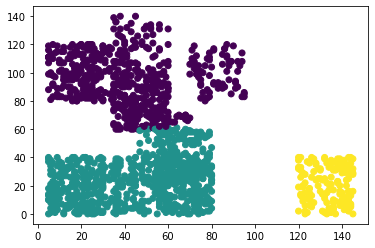

In [35]:
kmeanstest.kmeans_test(3)

In [36]:
kmeanstest.outlier(80)

,X,y
0,44.0,60.0
1,77.0,80.0
2,35.0,139.0
3,56.0,134.0
4,38.0,140.0
...,...,...
303,55.0,59.0
304,5.0,39.0
305,5.0,0.0
306,67.0,55.0


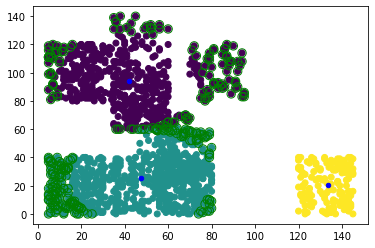

In [37]:
kmeanstest.kmeans_results()

Potassium and Nitrogen

In [38]:
kmeanstest.input_train(X_K,y)

array([[ 27,  21],
       [ 28,  29],
       [ 23,  60],
       ...,
       [ 31,  11],
       [204,  11],
       [ 22,  32]], dtype=int64)

[1 1 1 ... 1 2 1]
Calinski-Harabasz Index: 5553.924
Davies-Bouldin Index: 0.443
Silhouette Coefficient: 0.630


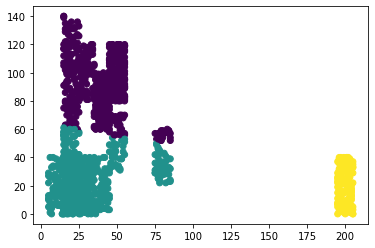

In [39]:
kmeanstest.kmeans_test(3)

In [40]:
kmeanstest.outlier(80)

,X,y
0,44.0,60.0
1,15.0,139.0
2,18.0,134.0
3,24.0,60.0
4,43.0,63.0
...,...,...
303,17.0,0.0
304,84.0,23.0
305,36.0,0.0
306,16.0,55.0


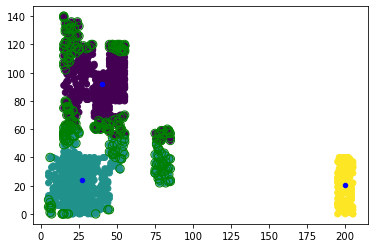

In [41]:
kmeanstest.kmeans_results()

Temperature and Nitrogen

In [42]:
kmeanstest.input_train(X_temp,y)

array([[27.00315545, 21.        ],
       [28.3471611 , 29.        ],
       [24.7947077 , 60.        ],
       ...,
       [27.92063282, 11.        ],
       [13.42988625, 11.        ],
       [23.97081395, 32.        ]])

[1 1 2 ... 1 1 1]
Calinski-Harabasz Index: 5589.646
Davies-Bouldin Index: 0.580
Silhouette Coefficient: 0.583


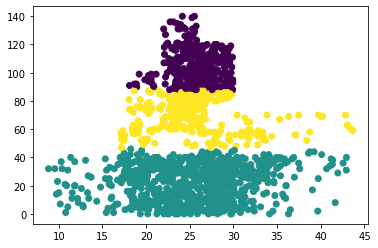

In [43]:
kmeanstest.kmeans_test(3)

In [44]:
kmeanstest.outlier(80)

,X,y
0,25.248679,139.0
1,23.808346,134.0
2,24.147295,140.0
3,25.864755,88.0
4,23.657241,131.0
...,...,...
303,27.100533,50.0
304,43.302049,61.0
305,27.440033,47.0
306,34.373291,55.0


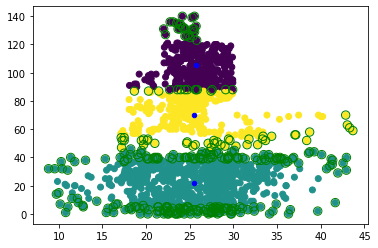

In [45]:
kmeanstest.kmeans_results()

Moisture and Nitrogen

In [46]:
kmeanstest.input_train(X_moist,y)

array([[47.67525434, 21.        ],
       [53.53903102, 29.        ],
       [70.04556743, 60.        ],
       ...,
       [51.77965917, 11.        ],
       [80.06633966, 11.        ],
       [62.35557553, 32.        ]])

[0 0 2 ... 0 1 1]
Calinski-Harabasz Index: 2690.078
Davies-Bouldin Index: 0.701
Silhouette Coefficient: 0.526


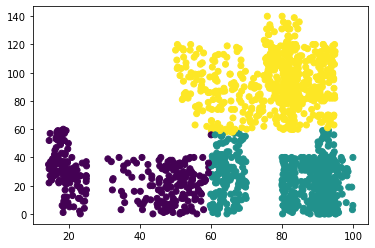

In [47]:
kmeanstest.kmeans_test(3)

In [48]:
kmeanstest.outlier(80)

,X,y
0,20.182383,5.0
1,18.374779,1.0
2,18.251421,57.0
3,15.936294,42.0
4,47.548852,2.0
...,...,...
303,76.726214,121.0
304,55.832890,113.0
305,74.894654,62.0
306,81.657696,62.0


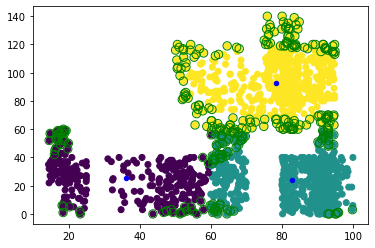

In [49]:
kmeanstest.kmeans_results()